In [1]:
import cv2
from PIL import Image, ImageOps

import numpy as np
import matplotlib.pyplot as plt

# 方法1: CV2

(103, 96)


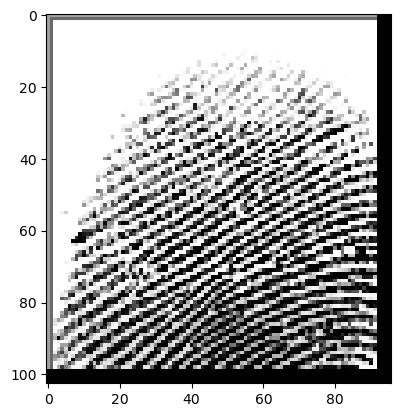

In [2]:
img = cv2.imread('imgs/F01_0.BMP') 
img = cv2.cvtColor(src=img, code=cv2.COLOR_BGR2GRAY)

print(img.shape)
plt.imshow(img, cmap='gray')

# 方法2: PIL

(103, 96)


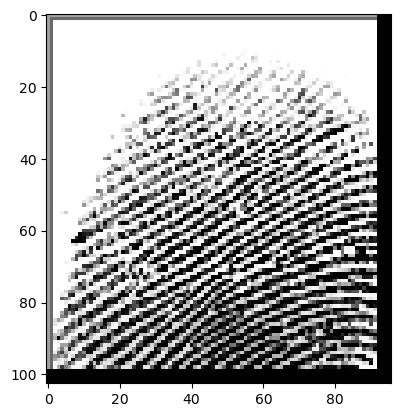

In [3]:
img = Image.open('imgs/F01_0.BMP')
img = ImageOps.grayscale(img)
img = np.array(img)

print(img.shape)
plt.imshow(img, cmap='gray')

# 濾波範例

In [4]:
def Gabor_filter(k_size = 111, sigma = 10, gamma = 1.2, Lambda = 10, psi = 0, angle = 0):
    mid = k_size // 2 # Kernel 中心點
    gabor = np.zeros((k_size, k_size), dtype = np.float32) #建立空的kernel
    
    for y in range(k_size):
        for x in range(k_size):
            px = x - mid
            py = y - mid
            
            theta = angle * np.pi / 180.
            
            x_1 = np.cos(theta) * px + np.sin(theta) * py
            y_1 = -np.sin(theta) * px + np.cos(theta) * py
            
            term_1 = np.exp(-(x_1**2 + gamma**2 * y_1**2) / (2 * sigma**2))
            term_2 = np.cos(2 * np.pi*x_1/Lambda + psi)
            gabor[y, x] = term_1 * term_2
    
    gabor = gabor / np.sum(np.abs(gabor))
    return gabor

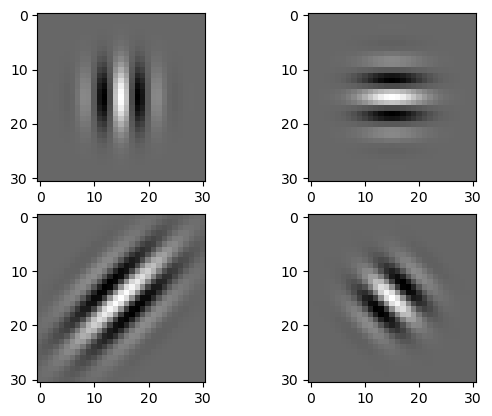

In [128]:
kernel_1 = Gabor_filter(k_size = 31, sigma = 4, gamma = 1, Lambda = 7., angle = 0)
kernel_2 = Gabor_filter(k_size = 31, sigma = 4, gamma = 1, Lambda = 7., angle = 90)
kernel_3 = Gabor_filter(k_size = 31, sigma = 4, gamma = 0.5, Lambda = 7., angle = 45)
kernel_4 = Gabor_filter(k_size = 31, sigma = 4, gamma = 1.0, Lambda = 7., angle = 135)

plt.figure()
plt.subplot(221)
plt.imshow(kernel_1, cmap='gray')
plt.subplot(222)
plt.imshow(kernel_2, cmap='gray')
plt.subplot(223)
plt.imshow(kernel_3, cmap='gray')
plt.subplot(224)
plt.imshow(kernel_4, cmap='gray')

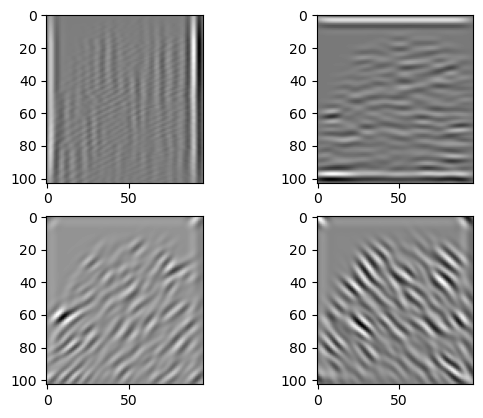

In [74]:
from scipy import signal

output_1 = signal.convolve2d(img, kernel_1, mode='same')
output_2 = signal.convolve2d(img, kernel_2, mode='same')
output_3 = signal.convolve2d(img, kernel_3, mode='same')
output_4 = signal.convolve2d(img, kernel_4, mode='same')

plt.figure()
plt.subplot(221)
plt.imshow(output_1, cmap='gray')
plt.subplot(222)
plt.imshow(output_2, cmap='gray')
plt.subplot(223)
plt.imshow(output_3, cmap='gray')
plt.subplot(224)
plt.imshow(output_4, cmap='gray')